In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import statistics 


In [2]:
data_train= pd.read_csv("C:/Users/Ami Thakkar/Documents/Disease_Predict/Disease_Training.csv")
data_test= pd.read_csv("C:/Users/Ami Thakkar/Documents/Disease_Predict/Disease_Testing.csv")

In [3]:
data_train.head()
data_train.shape
len(data_train.columns)

133

In [4]:
data_train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
data_train.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [9]:
disease_count= data_train['prognosis'].value_counts()
disease_count

Migraine                                   120
Chronic cholestasis                        120
Pneumonia                                  120
Cervical spondylosis                       120
Diabetes                                   120
Peptic ulcer diseae                        120
Psoriasis                                  120
Paralysis (brain hemorrhage)               120
Arthritis                                  120
Hyperthyroidism                            120
Heart attack                               120
Hypothyroidism                             120
AIDS                                       120
Typhoid                                    120
hepatitis A                                120
Dimorphic hemmorhoids(piles)               120
Malaria                                    120
Hypertension                               120
Varicose veins                             120
Hypoglycemia                               120
Allergy                                    120
Fungal infect

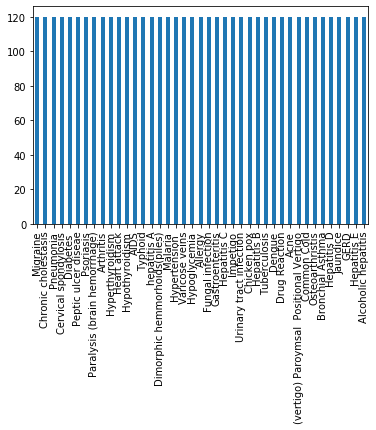

In [10]:
disease_count.plot.bar()

In [11]:
data_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [12]:
data_train.columns[0]

'itching'

In [13]:
data_train.iloc[:,1].sum()

786

In [14]:
def common_symptom(data,symptoms_dict):
    for i in range(len(data.columns)-1):
        symptom = data.columns[i]
        count= data.iloc[:,i].sum()
        symptoms_dict[symptom] = count
        


In [15]:
symptoms_dict={}
common_symptom(data_train,symptoms_dict)

In [16]:
symptoms_dict

{'itching': 678,
 'skin_rash': 786,
 'nodal_skin_eruptions': 108,
 'continuous_sneezing': 222,
 'shivering': 108,
 'chills': 798,
 'joint_pain': 684,
 'stomach_pain': 222,
 'acidity': 222,
 'ulcers_on_tongue': 108,
 'muscle_wasting': 108,
 'vomiting': 1914,
 'burning_micturition': 216,
 'spotting_ urination': 108,
 'fatigue': 1932,
 'weight_gain': 114,
 'anxiety': 114,
 'cold_hands_and_feets': 114,
 'mood_swings': 228,
 'weight_loss': 456,
 'restlessness': 228,
 'lethargy': 456,
 'patches_in_throat': 108,
 'irregular_sugar_level': 114,
 'cough': 564,
 'high_fever': 1362,
 'sunken_eyes': 108,
 'breathlessness': 450,
 'sweating': 678,
 'dehydration': 108,
 'indigestion': 222,
 'headache': 1134,
 'yellowish_skin': 912,
 'dark_urine': 570,
 'nausea': 1146,
 'loss_of_appetite': 1152,
 'pain_behind_the_eyes': 120,
 'back_pain': 228,
 'constipation': 228,
 'abdominal_pain': 1032,
 'diarrhoea': 564,
 'mild_fever': 354,
 'yellow_urine': 114,
 'yellowing_of_eyes': 816,
 'acute_liver_failure': 11

<BarContainer object of 132 artists>

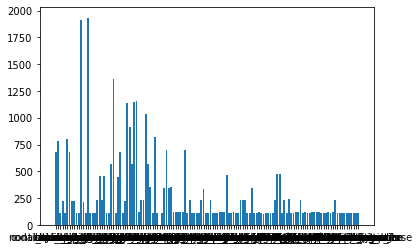

In [17]:
names = list(symptoms_dict.keys())
values = list(symptoms_dict.values())

plt.bar(range(len(symptoms_dict)),values,tick_label=names)

In [18]:
sorted_dict_symptom={} 
  
for i in sorted (symptoms_dict.items(),key=lambda x: x[1],reverse=True) :  
    key=i[0]
    value=i[1]
    sorted_dict_symptom[key]=value
print(sorted_dict_symptom)

{'fatigue': 1932, 'vomiting': 1914, 'high_fever': 1362, 'loss_of_appetite': 1152, 'nausea': 1146, 'headache': 1134, 'abdominal_pain': 1032, 'yellowish_skin': 912, 'yellowing_of_eyes': 816, 'chills': 798, 'skin_rash': 786, 'malaise': 702, 'chest_pain': 696, 'joint_pain': 684, 'itching': 678, 'sweating': 678, 'dark_urine': 570, 'cough': 564, 'diarrhoea': 564, 'irritability': 474, 'muscle_pain': 474, 'excessive_hunger': 462, 'weight_loss': 456, 'lethargy': 456, 'breathlessness': 450, 'mild_fever': 354, 'phlegm': 354, 'swelled_lymph_nodes': 348, 'blurred_and_distorted_vision': 342, 'loss_of_balance': 342, 'dizziness': 336, 'abnormal_menstruation': 240, 'fast_heart_rate': 234, 'muscle_weakness': 234, 'depression': 234, 'red_spots_over_body': 234, 'mood_swings': 228, 'restlessness': 228, 'back_pain': 228, 'constipation': 228, 'neck_pain': 228, 'obesity': 228, 'stiff_neck': 228, 'swelling_joints': 228, 'family_history': 228, 'painful_walking': 228, 'continuous_sneezing': 222, 'stomach_pain': 

<BarContainer object of 5 artists>

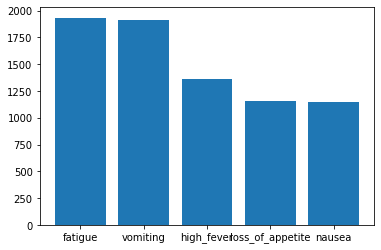

In [19]:
names = list(sorted_dict_symptom.keys())[0:5]
values = list(sorted_dict_symptom.values())[0:5]
plt.bar(range(len(list(sorted_dict_symptom.values())[0:5])),values,tick_label=names)

In [20]:
data_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [21]:
data_train["sum_symptom"] = data_train.sum(axis=1)
print(data_train)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
5           0          1                     1                    0   
6           1          0                     1                    0   
7           1          1                     0                    0   
8           1          1                     1                    0   
9           1          1                     1                    0   
10          0          0                     0                    1   
11          0          0                     0                    0   
12          0          0                     0                    1   
13    

In [22]:
for i in data_train.columns:
    b=data_train.groupby(['prognosis'])['sum_symptom'].apply(lambda g: g.values.mean()).to_dict()
print(b)

{'(vertigo) Paroymsal  Positional Vertigo': 5.65, 'AIDS': 3.65, 'Acne': 3.65, 'Alcoholic hepatitis': 6.65, 'Allergy': 3.6, 'Arthritis': 4.75, 'Bronchial Asthma': 5.6, 'Cervical spondylosis': 4.65, 'Chicken pox': 10.55, 'Chronic cholestasis': 6.65, 'Common Cold': 16.6, 'Dengue': 13.55, 'Diabetes ': 9.6, 'Dimorphic hemmorhoids(piles)': 4.75, 'Drug Reaction': 4.55, 'Fungal infection': 3.6, 'GERD': 5.55, 'Gastroenteritis': 3.65, 'Heart attack': 3.65, 'Hepatitis B': 11.6, 'Hepatitis C': 5.65, 'Hepatitis D': 8.55, 'Hepatitis E': 12.6, 'Hypertension ': 4.6, 'Hyperthyroidism': 10.6, 'Hypoglycemia': 11.6, 'Hypothyroidism': 12.6, 'Impetigo': 4.65, 'Jaundice': 7.6, 'Malaria': 7.6, 'Migraine': 8.55, 'Osteoarthristis': 5.7, 'Paralysis (brain hemorrhage)': 3.65, 'Peptic ulcer diseae': 5.6, 'Pneumonia': 10.6, 'Psoriasis': 5.7, 'Tuberculosis': 15.6, 'Typhoid': 10.6, 'Urinary tract infection': 3.65, 'Varicose veins': 6.6, 'hepatitis A': 10.6}


In [23]:
b_dict={} 
  
for i in sorted (b.items(),key=lambda x: x[1],reverse=True) :  
    key=i[0]
    value=i[1]
    b_dict[key]=value
print(b_dict)

{'Common Cold': 16.6, 'Tuberculosis': 15.6, 'Dengue': 13.55, 'Hepatitis E': 12.6, 'Hypothyroidism': 12.6, 'Hepatitis B': 11.6, 'Hypoglycemia': 11.6, 'Hyperthyroidism': 10.6, 'Pneumonia': 10.6, 'Typhoid': 10.6, 'hepatitis A': 10.6, 'Chicken pox': 10.55, 'Diabetes ': 9.6, 'Hepatitis D': 8.55, 'Migraine': 8.55, 'Jaundice': 7.6, 'Malaria': 7.6, 'Alcoholic hepatitis': 6.65, 'Chronic cholestasis': 6.65, 'Varicose veins': 6.6, 'Osteoarthristis': 5.7, 'Psoriasis': 5.7, '(vertigo) Paroymsal  Positional Vertigo': 5.65, 'Hepatitis C': 5.65, 'Bronchial Asthma': 5.6, 'Peptic ulcer diseae': 5.6, 'GERD': 5.55, 'Arthritis': 4.75, 'Dimorphic hemmorhoids(piles)': 4.75, 'Cervical spondylosis': 4.65, 'Impetigo': 4.65, 'Hypertension ': 4.6, 'Drug Reaction': 4.55, 'AIDS': 3.65, 'Acne': 3.65, 'Gastroenteritis': 3.65, 'Heart attack': 3.65, 'Paralysis (brain hemorrhage)': 3.65, 'Urinary tract infection': 3.65, 'Allergy': 3.6, 'Fungal infection': 3.6}


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

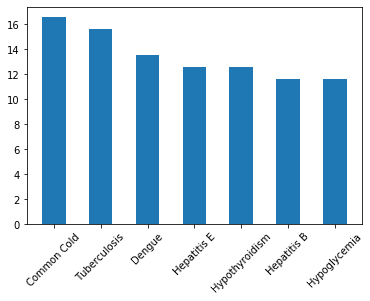

In [24]:
names_ = list(b_dict.keys())[0:7]
values_ = list(b_dict.values())[0:7]
plt.bar(range(len(list(b_dict.values())[0:7])),values_,tick_label=names_,width=0.5)
plt.xticks(rotation=45)

In [25]:
data_train['sum_symptom']=data_train['sum_symptom'].astype(float)


In [26]:

cols=range(len(data_train.columns)-2)
cols
data_=data_train.iloc[:,cols]
data_


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


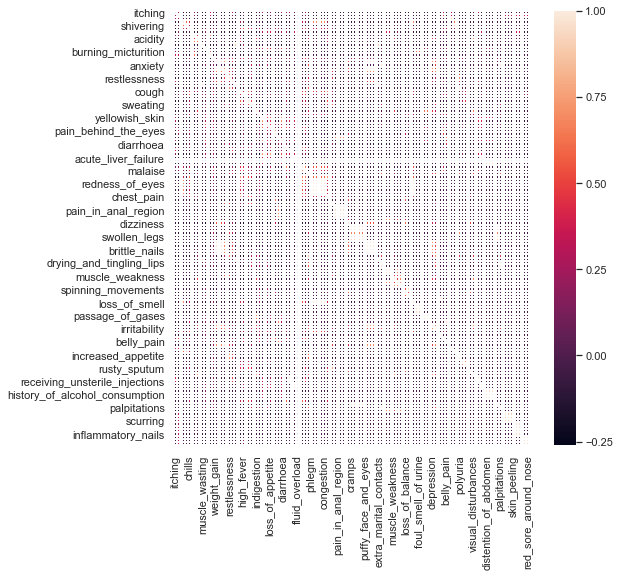

In [27]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(data_.corr(), annot=False,
                 linewidths=1, fmt='.2f')

In [28]:
data_.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
chills,-0.175905,-0.029324,-0.065917,0.446238,0.295332,1.000000,-0.004688,-0.095646,-0.095646,-0.065917,...,-0.065917,-0.065917,-0.065917,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765
joint_pain,-0.160650,0.171134,-0.060200,-0.087351,-0.060200,-0.004688,1.000000,-0.087351,-0.087351,-0.060200,...,-0.060200,-0.060200,-0.060200,0.359845,0.359845,0.359845,0.359845,-0.061889,-0.061889,-0.061889
stomach_pain,0.202850,0.161784,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,1.000000,0.433917,0.649078,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
acidity,-0.086906,-0.094786,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,0.433917,1.000000,0.608981,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
ulcers_on_tongue,-0.059893,-0.065324,-0.022444,-0.032566,-0.022444,-0.065917,-0.060200,0.649078,0.608981,1.000000,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073


implementing KNN

In [29]:

cols_train=range(len(data_train.columns)-2)
cols_train
x_train = data_train.iloc[:, cols_train]
y_train = data_train['prognosis']
x_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
cols_test=range(len(data_test.columns)-1)
cols_test
x_test = data_test.iloc[:, cols_test]
y_test = data_test['prognosis']
y_test

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [98]:
print(x_test)

[[ 2.50132708  2.29336913  6.6749948  ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 ...
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778  2.29336913 -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778  2.29336913 -0.14981285 ...  6.49291111  6.49291111
   6.49291111]]


In [83]:
klen=round(math.sqrt(len(x_train)))
klen

70

In [108]:
tpredict=[]
#print(tpredict)
for i in range(1,klen):
    #Apply knn with k = i
    knn = KNeighborsClassifier(n_neighbors=i, metric='hamming')
    #print(knn)
    knn.fit(x_train, y_train)
    accuracy_test=accuracy_score(y_test,knn.predict(x_test))
    print(accuracy_test)
    #ypred = knn.predict(x_test)
    #ypred_df = pd.DataFrame(ypred)     
    #print("ypred"+ypred_df)
   # print("ytest"+y_test)
    #finding accurately predicted values
    #print(statistics.mean(ypred==y_test))
    #tpredict.append(statistics.mean(ypred_df==y_test))
              


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [95]:
print(tpredict)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


In [91]:
error=1-tpredict
print(error)

TypeError: unsupported operand type(s) for -: 'int' and 'list'